In [53]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

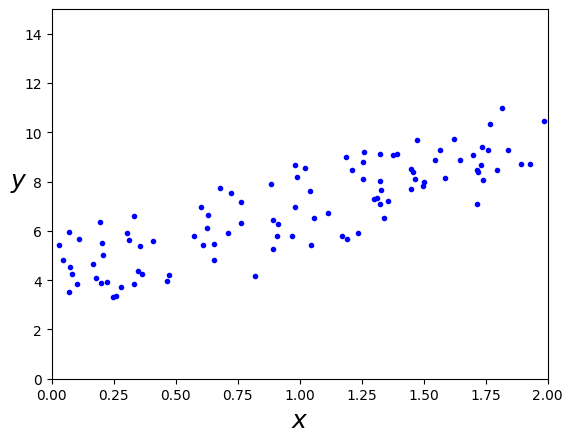

In [54]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [43]:
print(X.shape)

(100, 1)


In [44]:
print(y.shape)

(100, 1)


In [55]:
Xave = np.average(X)
print(Xave)

0.9713035565451689


In [56]:
Xsum = np.sum(X)
print(Xsum)

97.13035565451689


In [57]:
np.sum((X-Xave)**2)

np.float64(32.786261285446365)

In [58]:
yave = np.average(y)
b1 = np.sum((X-Xave)*(y-yave))/np.sum((X-Xave)**2)
b0 = yave - b1*Xave

In [59]:
print(f'b0: {b0: .4f}')
print(f'b1: {b1: .4f}')

b0:  4.1366
b1:  2.7998


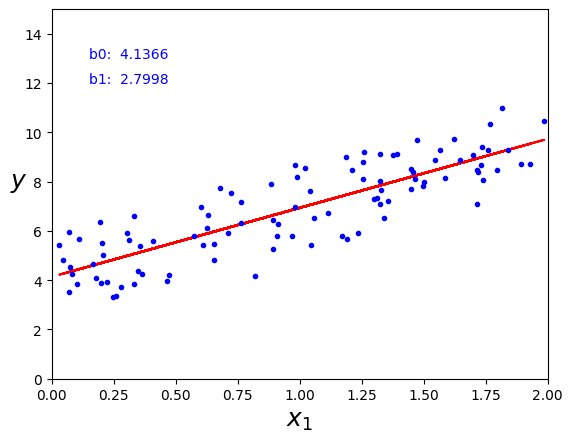

In [60]:
y_predict = b0 + b1*X

plt.plot(X,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.text(0.15,13,f'b0: {b0: .4f}', fontsize=10, color='blue')
plt.text(0.15,12,f'b1: {b1: .4f}', fontsize=10, color='blue')
plt.show()

In [61]:
X_b = np.c_[np.ones((100,1)),X]

X_b is A for our case <br>
theta is x <br>
y is b

In [63]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [64]:
print(theta.shape)

(2, 1)


In [65]:
print(f'theta0: {theta[0,0]: .4f}')
print(f'theta1: {theta[1,0]: .4f}')

theta0:  4.1366
theta1:  2.7998


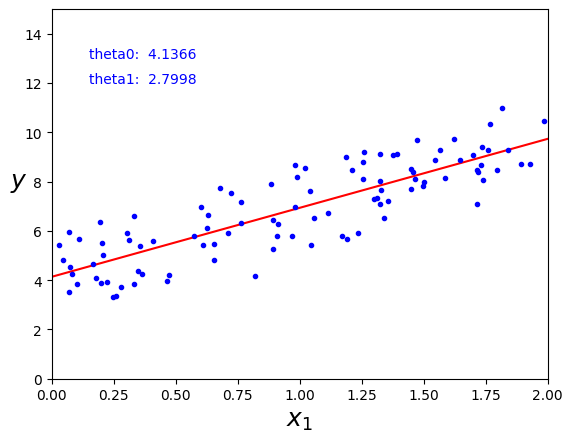

In [66]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta)

plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.text(0.15,13,f'theta0: {theta[0,0]: .4f}', fontsize=10, color='blue')
plt.text(0.15,12,f'theta1: {theta[1,0]: .4f}', fontsize=10, color='blue')
plt.show()

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def  cal_cost(theta,X,y):
    m = len(y)

    predictions = X.dot(theta)	# calculate the prediction using X and theta
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

In [68]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):

        prediction = np.dot(X, theta) #use X and theta to compute prediction

        theta = theta - learning_rate*(1/m)*(X.T.dot((prediction-y))) #update the theta

        #track the theta_history
        theta_history[it,:] =theta.T
        #track the cost history
        cost_history[it]  = cal_cost(theta,X,y)

    return theta, cost_history, theta_history

In [80]:
lr =0.1
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.137,
Theta1:          2.800
Final cost/MSE:  0.499


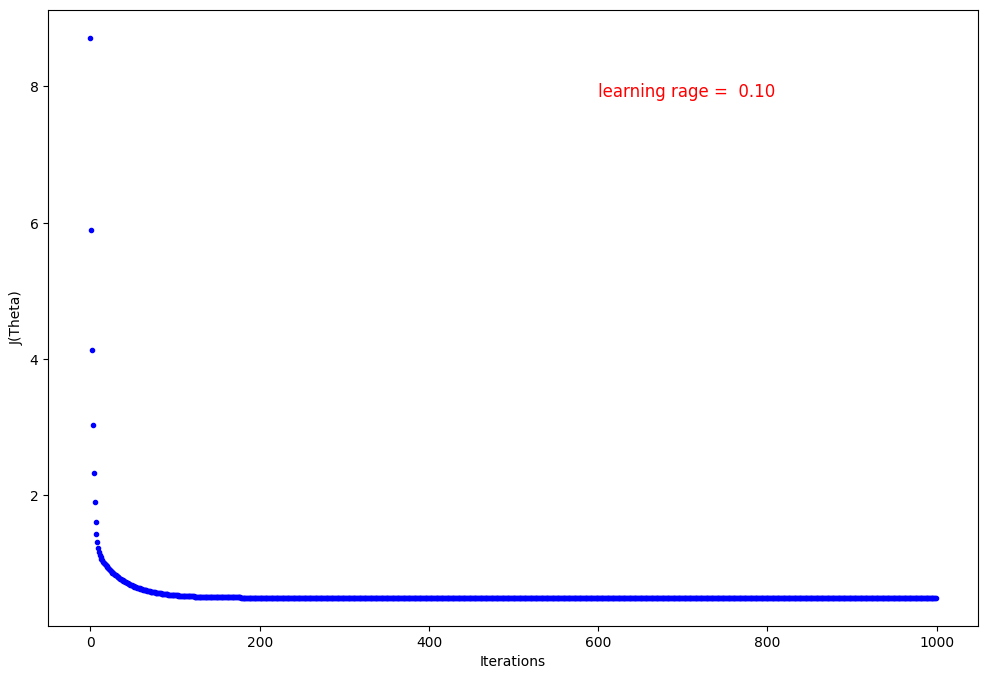

In [81]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.text(n_iter*0.6, cost_history[0]*0.9, f'learning rage = {lr: .2f}', fontsize=12, color='red' )
#ax.text(n_iter*0.6, cost_history[0]*0.9-0.7,f'theta0: {theta[0,0]: .4f}', fontsize=12, color='blue')
#ax.text(n_iter*0.6, cost_history[0]*0.9-1.4,f'theta1: {theta[1,0]: .4f}', fontsize=12, color='blue')
_=ax.plot(range(n_iter),cost_history,'b.')


In [82]:
def plot_GD(n_iter,lr,ax,ax1=None):
    _ = ax.plot(X,y,'b.')
    theta = np.random.randn(2,1)
    tr =0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)
        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
    if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')


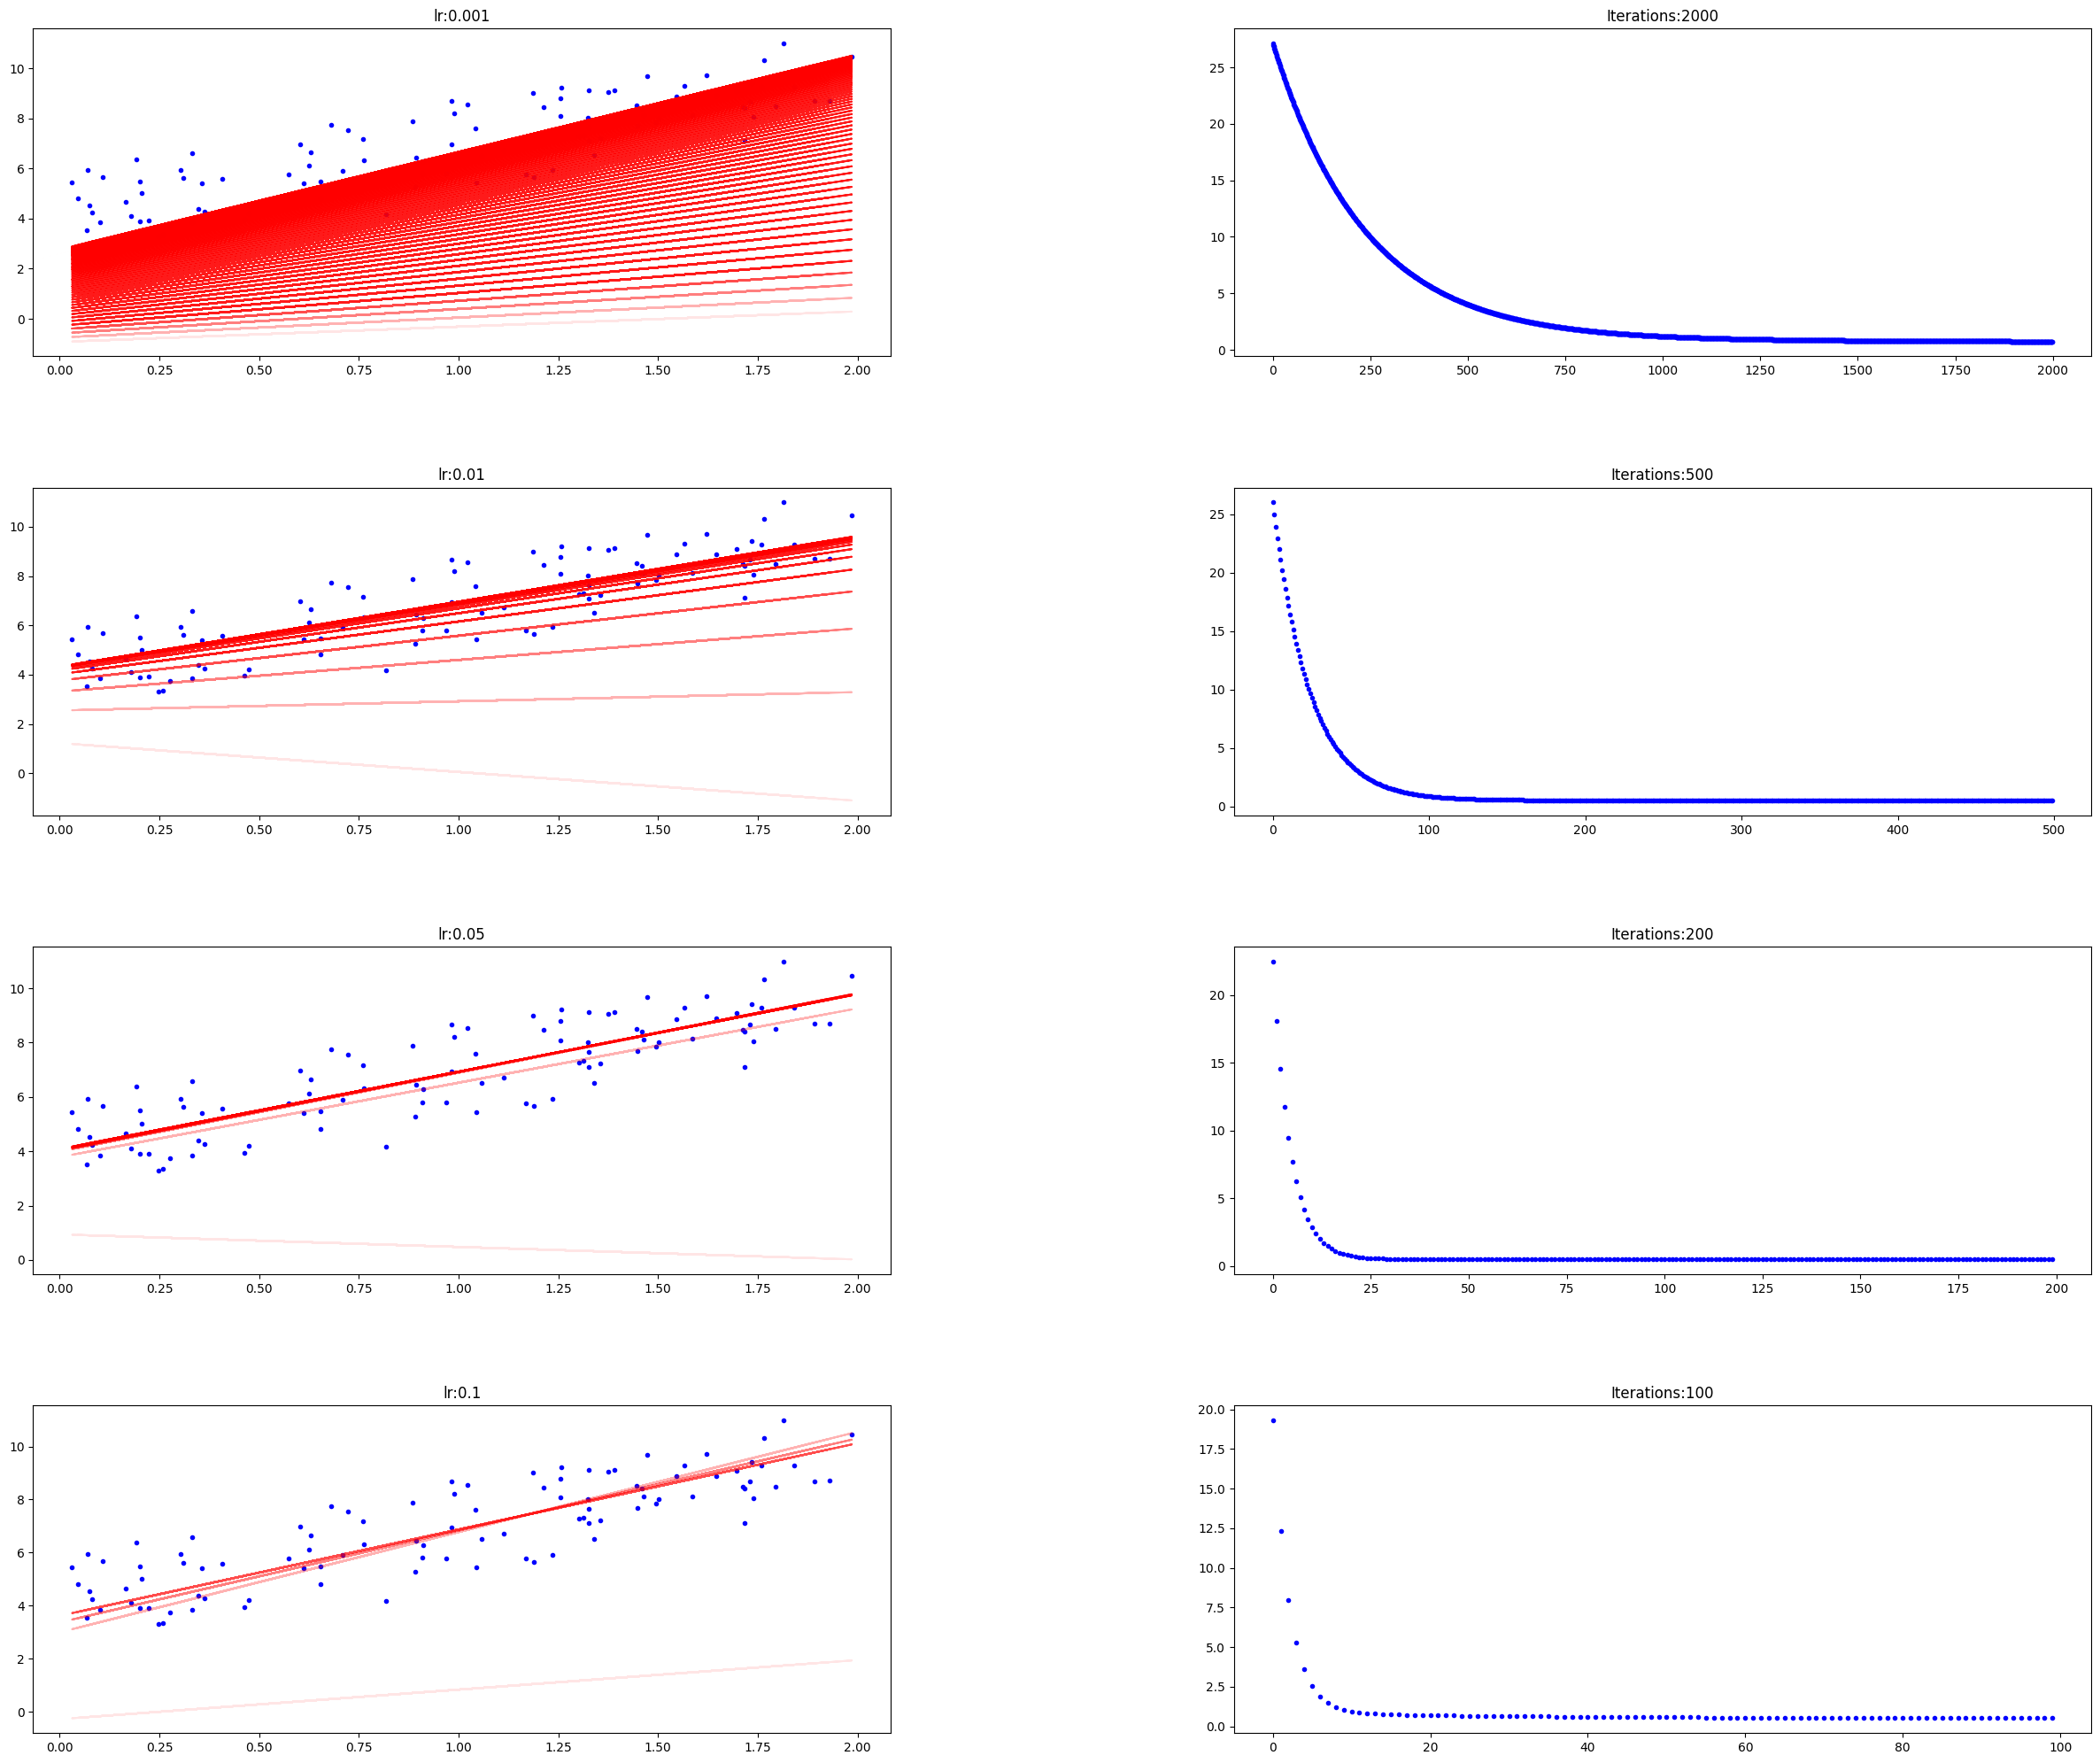

In [83]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]

count =0
for n_iter, lr in it_lr:
    count += 1

    ax = fig.add_subplot(4, 2, count)
    count += 1

    ax1 = fig.add_subplot(4,2,count)

    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
